# Virtual Pruning

## Importing the digitized structure

In [28]:
from openalea.mtg import *
from numpy import *
import numpy as np
from importlib import reload
import numpy as np
import mangoG3; reload(mangoG3)
from mangoG3 import *

g = get_G3_mtg()


In [29]:
from matplotlib.pyplot import *
import mtgplot as mp
reload(mp)


<module 'mtgplot' from '/Users/fboudon/Develop/oagit/virtualpruning/notebooks/mtgplot.py'>

In [4]:
#sw = mp.plot_tree(g)
#sw

## Estimation of light interception

In [42]:
import lightestimation as le ; reload(le)
from lightestimation import *

In [31]:
sun, sky = get_light_sources()

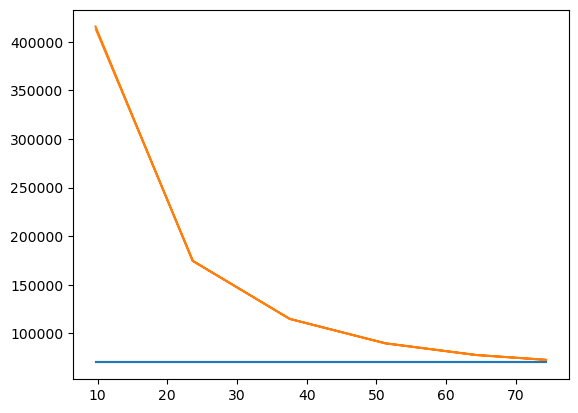

In [34]:
plot(sun[1],sun[2])
plot(sun[1],sun[2]/sin(radians(sun[1])))

29999.999999999993
59309.84225914429


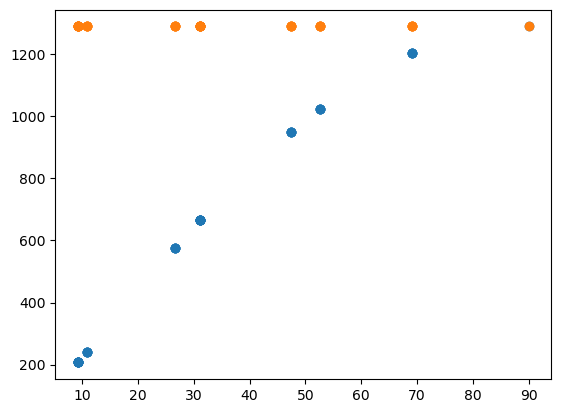

In [38]:
plot(sky[1],sky[2],'o')
plot(sky[1],sky[2]/sin(radians(sky[1])),'o')
print(sum(sky[2]))
print(sum(sky[2]/sin(radians(sky[1]))))

In [39]:
scene = mp.representation(g, wood = False, leaves=True)

In [40]:
caribumango = toCaribuScene(scene)

Convert scene for caribu
done in 336.9940936565399


In [43]:
agg = caribu(caribumango, sun, sky)

start caribu...
Create light source ...  58  sources.
Run caribu
made in 18.22705888748169


In [44]:
mp.plot_projection(scene, agg['irradiance'])

SceneWidget(scenes=[{'id': 'aJS6j0bUjkgxv6XvpbJCk5Msw', 'data': b'x\xda\x8c\xdd\x07X\x14G\x1b\x00`\xec\xa8\xb1…

In [45]:
agg2 = plantgllight(scene, sun, sky)


start plantgl light...
Create light source ...  58  sources.
Run plantGL
made in 218.14173913002014


In [46]:
#print(agg2)
mp.plot_projection(scene, agg2['irradiance'])

SceneWidget(scenes=[{'id': 'uEgavbjQTn4u2yA40YthGOxmp', 'data': b'x\xda\x8c\xdd\x07X\xd5V\xfb\x00p\xdc\xa8u/\\…

In [47]:
print(min(agg['irradiance']),max(agg['irradiance']),np.mean(agg['irradiance']))
print(min(agg2['irradiance']),max(agg2['irradiance']),np.mean(agg2['irradiance']))


755.8925432989233 1101794.5674471445 178140.7177864063


<AxesSubplot:>

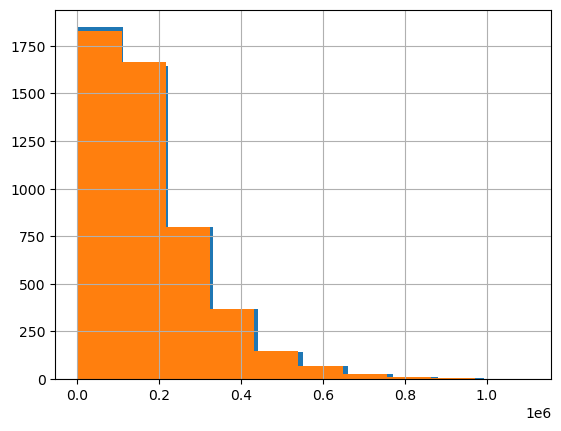

In [48]:
agg2['irradiance'].hist()
agg['irradiance'].hist()


[  1.01931803 -21.72635255]


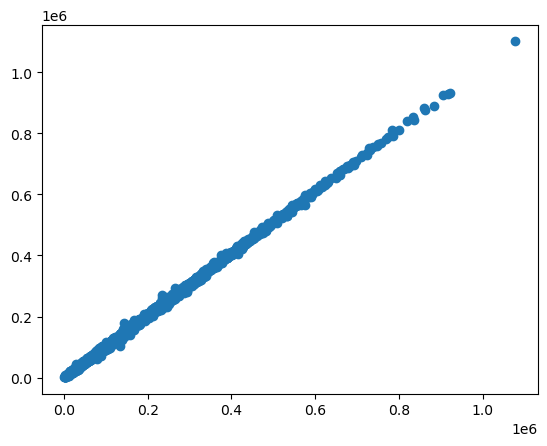

In [49]:
scatter(agg['irradiance'],agg2['irradiance'])
print(np.polyfit(agg['irradiance'],agg2['irradiance'],1))

In [50]:
extend_mtg_with_light(g, agg)

## Test with wood representation

In [51]:
scene2 = mp.representation(g, wood = True, leaves=True)

In [ ]:
agg3 = plantgllight(scene2, sun, sky)

start plantgl light...
Create light source ...  58  sources.
Run plantGL


In [ ]:
mp.plot_projection(scene2, agg3['irradiance'])